In [4]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric, \
    plot_binned_metric_vs_mean_metric, plot_two_metrics_by_ephoc, plot_two_metrics_with_mean, plot_two_metrics_with_mean_multi_ep, plot_two_metrics_by_ephoc, plot_two_ann_metrics_train_test, plot_two_ann_metrics_begining_end,plot_mean_r2_bars
import joblib


COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]



In [5]:
results_path = "/Volumes/noamaz/modularity/retina/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'

task = "retina"
num_layers = '3'
dim1, dim2 = [5, 2]
dims=[6,5,2,2]
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")

plot_path = f"{local_base_path}/plots/retina_multi_archs/retina_{num_layers}_layers_{dim1}_{dim2}"

In [6]:
first_analsis_csv_name = f'2023-08-20-12-33-37_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv'
first_analsis = pd.read_csv(f"{results_path}/retina_{num_layers}_layers_{dim1}_{dim2}/10000_ep/{first_analsis_csv_name}").rename(
    columns={'connectivity_ratio': 'density'}).sort_values('mean_performance', ascending=False)
first_analsis['sum_normalized_motifs_count'] = first_analsis['normalized_motifs_count_0'] + \
                                               first_analsis['normalized_motifs_count_1'] + \
                                               first_analsis['normalized_motifs_count_2']


In [8]:
reg_res_path = f'{results_path}/retina_{num_layers}_layers_{dim1}_{dim2}/10000_ep/teach_archs_regression_results/'
p = [
    'retina_2023-08-21-13-51-37_lr_0.001_bs_512_output_const_meta_2k_ephoc.csv',
    'retina_2023-08-21-13-51-37_lr_0.005_bs_512_output_const_meta_2k_ephoc.csv',
    'retina_2023-08-21-13-51-37_lr_0.001_bs_512_output_all_meta_2k_ephoc.csv',
    'retina_2023-08-21-13-51-37_lr_0.005_bs_512_output_all_meta_2k_ephoc.csv',
    'retina_2023-08-21-13-51-37_lr_0.001_bs_512_output_all_meta_and_adj_2k_ephoc.csv',
    'retina_2023-08-21-13-51-37_lr_0.005_bs_512_output_all_meta_and_adj_2k_ephoc.csv',

]
results = [
    pd.read_csv(f"{reg_res_path}/{path}")
    for path in p
]

names = [
    'lr 0.001',
    'lr 0.005',
    'lr 0.001 all meta',
    'lr 0.005 all meta',
    'lr 0.001 all meta and adj',
    'lr 0.005 all meta and adj',
]

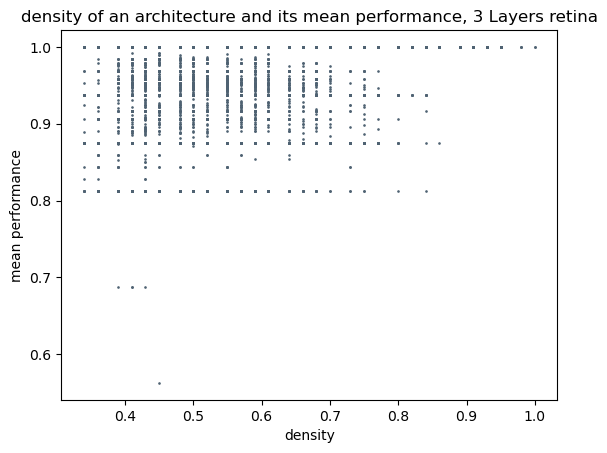

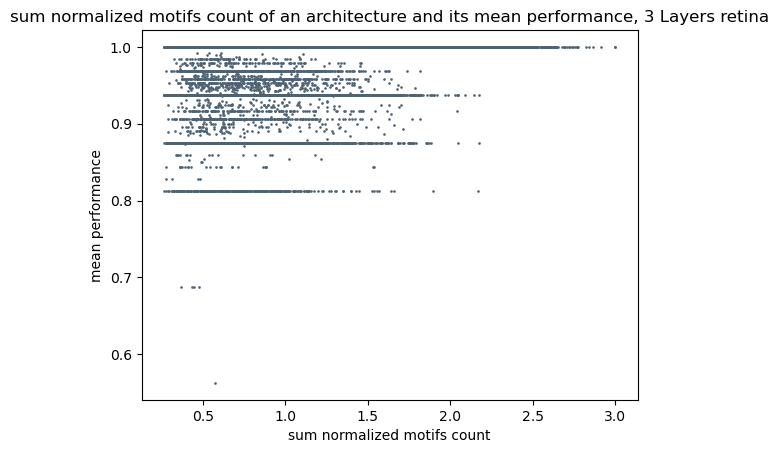

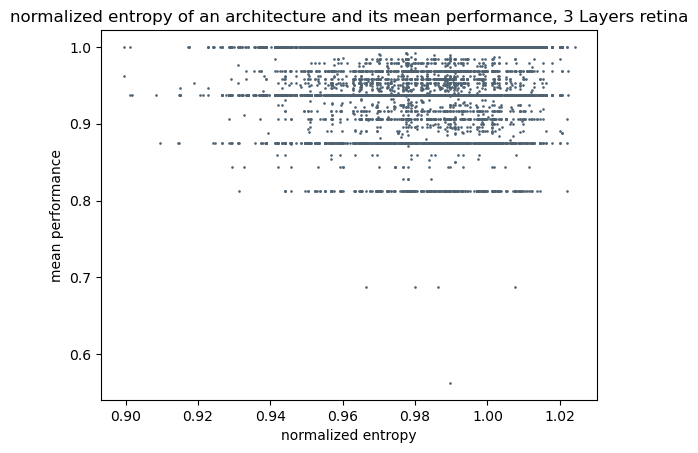

In [9]:
for x_metric_name, y_metric_name in [
    ('density', 'mean_performance'),
    ('sum_normalized_motifs_count', 'mean_performance'),
    ('normalized_entropy', 'mean_performance'),
]:
    plot_two_metrics(
        x_metric_name=x_metric_name,
        y_metric_name=y_metric_name,
        result_df=first_analsis,
        task=task,
        time_str=time_str,
        plot_path=plot_path,
        name_addition='_multi_archs',
        title_addition=f'{num_layers} Layers ',
        mark_size=0.8,
    )

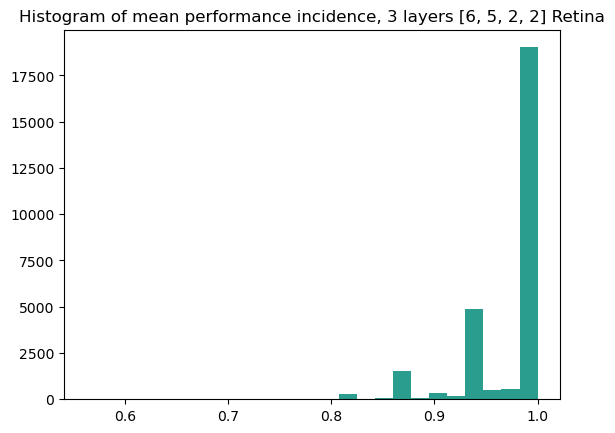

In [10]:
plt.figure()
plt.hist(first_analsis['mean_performance'], bins=25, color=COLORS[-3])
plt.title(f'Histogram of mean performance incidence, 3 layers [6, {dim1}, {dim2}, 2] Retina')
plt.savefig(
    f"{plot_path}/{time_str}_mean_performance_hist.png")
plt.show()

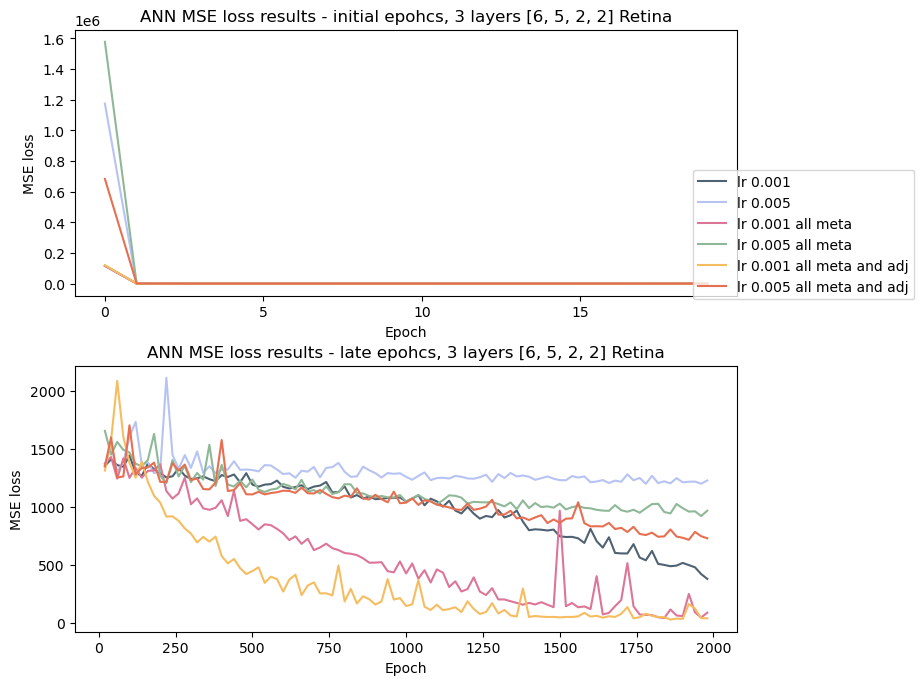

In [11]:
n = 20
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))
for i, (name, res) in enumerate(zip(names, results)):
    ax1.plot(res['Epoch'][:n], res['losses'][:n], label=f'{name}', c=COLORS[i])
    ax2.plot(res['Epoch'][n::20], res['losses'][n::20], label=f'{name}', c=COLORS[i])
ax1.set_title(f'ANN MSE loss results - initial epohcs, 3 layers [6, {dim1}, {dim2}, 2] Retina')
ax2.set_title(f'ANN MSE loss results - late epohcs, 3 layers [6, {dim1}, {dim2}, 2] Retina')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('MSE loss')
ax2.set_ylabel('MSE loss')
ax1.set_xticks(np.arange(n)[::5])
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.1, 0.5))
plt.savefig(
    f"{plot_path}/{time_str}_loss_ANN.png")
plt.show()

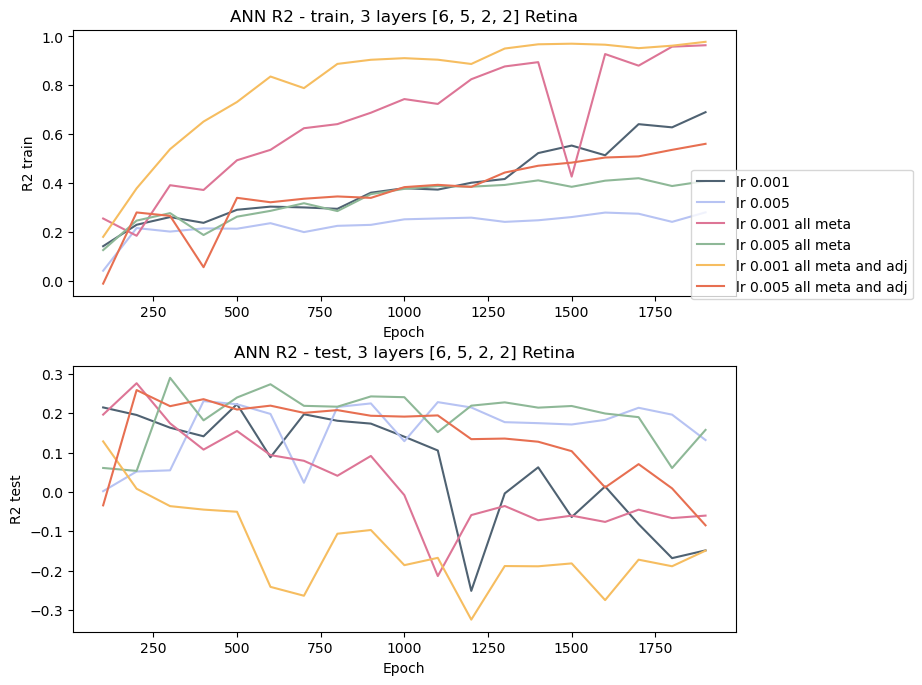

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 8))
for i, (name, res) in enumerate(zip(names, results)):
    ax1.plot(res['Epoch'][100::100], res['r2s train'][100::100], label=f'{name}', c=COLORS[i])
    ax2.plot(res['Epoch'][100::100], res['r2s test'][100::100], label=f'{name}', c=COLORS[i])
ax1.set_title(f'ANN R2 - train, 3 layers [6, {dim1}, {dim2}, 2] Retina')
ax2.set_title(f'ANN R2 - test, 3 layers [6, {dim1}, {dim2}, 2] Retina')
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('R2 train')
ax2.set_ylabel('R2 test')
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.1, 0.5))
plt.savefig(
    f"{plot_path}/{time_str}_r2_ANN.png")
plt.show()

In [13]:
lgb_res_path = '/Volumes/noamaz/modularity/retina/dynamic_retina_3_layers//lightgbm_regression_tree/2023-08-15-14-15-34_lightgbm_regression_results.pkl'

with open(lgb_res_path, 'rb') as fp:
    lgb_res = joblib.load(fp)
a = lgb_res.pop('big')

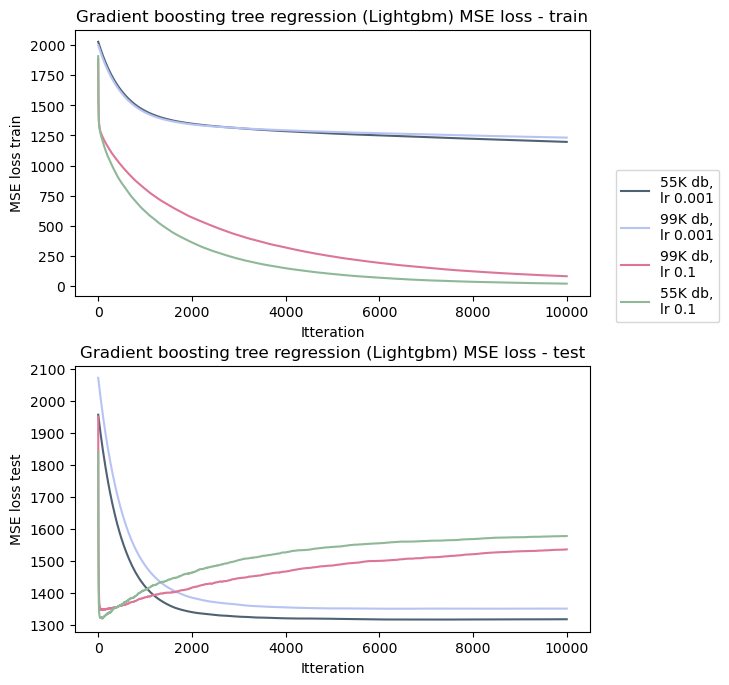

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8))
lgm_names = ['55K db,\nlr 0.001', '99K db,\nlr 0.001', '99K db,\nlr 0.1', '55K db,\nlr 0.1', ]
for i, (lgm_name, (res_k, res_v)) in enumerate(zip(lgm_names, lgb_res.items())):
    if res_k == 'big':
        continue
    ax1.plot(np.arange(len(res_v['mse_loss_train']['l2'])), res_v['mse_loss_train']['l2'], label=f'{lgm_name}',
             c=COLORS[i])
    ax2.plot(np.arange(len(res_v['mse_loss_test']['l2'])), res_v['mse_loss_test']['l2'], label=f'{lgm_name}',
             c=COLORS[i])
ax1.set_title('Gradient boosting tree regression (Lightgbm) MSE loss - train')
ax2.set_title('Gradient boosting tree regression (Lightgbm) MSE loss - test')
ax1.set_xlabel('Itteration')
ax2.set_xlabel('Itteration')
ax1.set_ylabel('MSE loss train')
ax2.set_ylabel('MSE loss test')
box1 = ax1.get_position()
box2 = ax2.get_position()
ax1.set_position([box1.x0, box1.y0, box1.width * 0.95, box1.height * 0.95, ])
ax2.set_position([box2.x0, box2.y0, box2.width * 0.95, box2.height * 0.95, ])

# Put a legend to the right of the current axis
ax1.legend(loc='upper center', ncol=1, fancybox=True, bbox_to_anchor=(1.15, 0.5))

Text(0, 0.5, 'R2 - test')

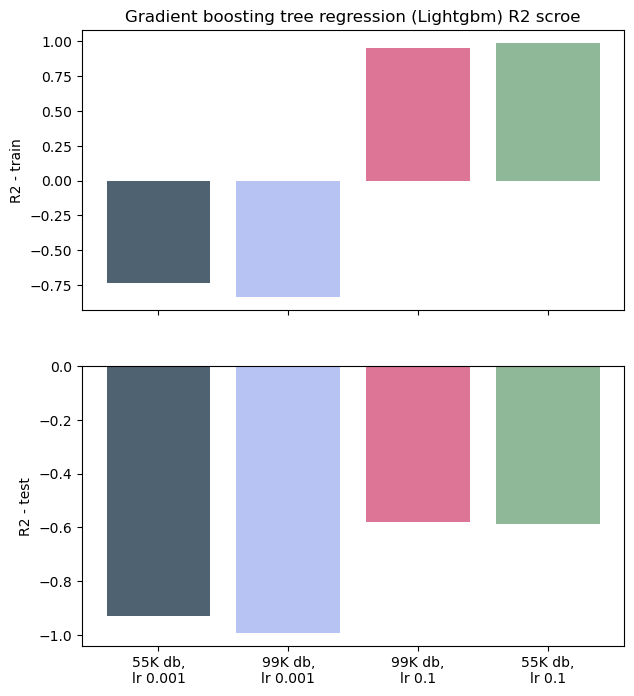

In [15]:
train_r2s = [
    res_v['train_r2']
    for res_v in lgb_res.values()
]
test_r2s = [
    res_v['test_r2']
    for res_v in lgb_res.values()
]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), sharex='all')
ax1.bar(lgm_names, train_r2s, color=COLORS)
ax2.bar(lgm_names, test_r2s, color=COLORS)
ax1.set_title('Gradient boosting tree regression (Lightgbm) R2 scroe')
#ax2.set_title('Gradient boosting tree regression (Lightgbm) R2 - test')
ax1.set_ylabel('R2 - train')
ax2.set_ylabel('R2 - test')

In [16]:
fs = [
    "10000_ep/2023-08-20-12-33-37_all_results_from_teach_archs_results_with_motifs_no_duplicates.csv",
    "2000_ep/2023-08-31-17-40-20_all_results_from_teach_archs_results_with_motifs2000_ep.csv",
    "500_ep/2023-08-31-17-12-13_all_results_from_teach_archs_results_with_motifs500_ep.csv",
    "100_ep/2023-08-31-16-53-41_all_results_from_teach_archs_results_with_100_eph_no_duplicates.csv",
]
results = [
    pd.read_csv(f"{results_path}/retina_{num_layers}_layers_{dim1}_{dim2}/{path}")
    for path in fs
]
num_ephocs = [
    '10000 eph',
    '2000 eph',
    '500 eph',
    '100 eph',
 ]

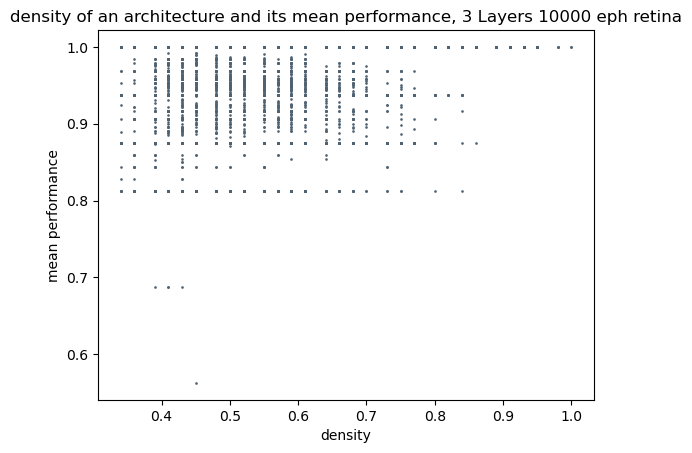

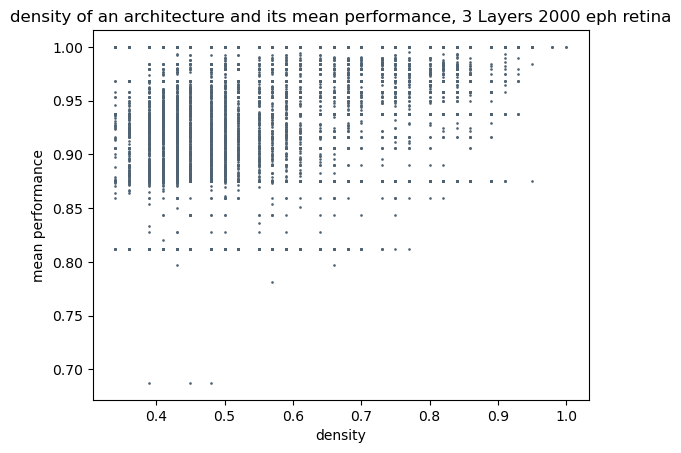

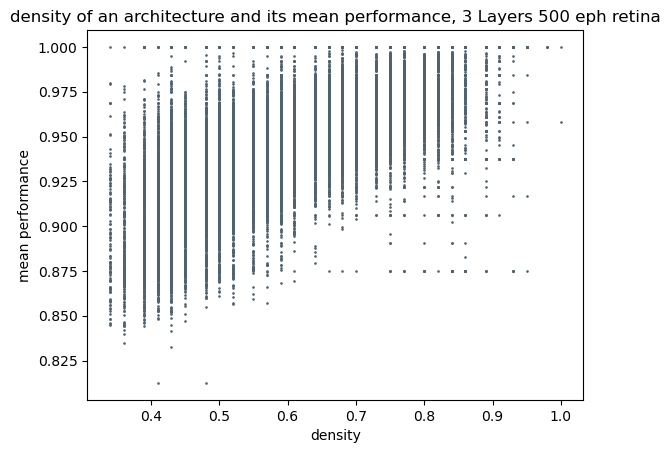

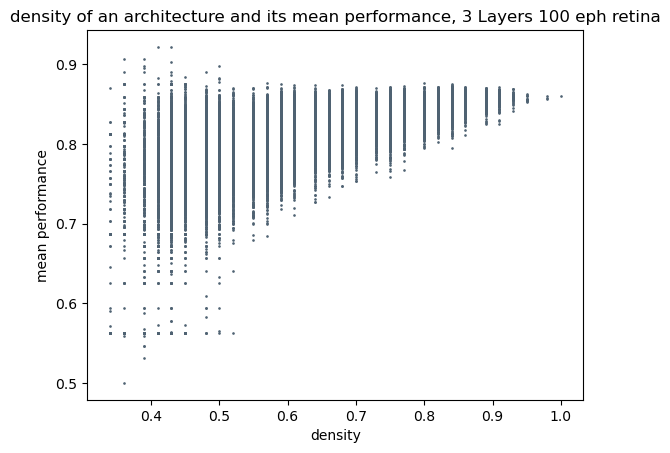

In [17]:
for i, (result_df, eph_str) in enumerate(zip(results, num_ephocs)):
    for x_metric_name, y_metric_name in [
        ('density', 'mean_performance'),
      #  ('sum_normalized_motifs_count', 'mean_performance'),
       # ('normalized_entropy', 'mean_performance'),
    ]:
        result_df =result_df.rename(columns={'connectivity_ratio': 'density'}).sort_values('mean_performance', ascending=False)
        result_df['sum_normalized_motifs_count'] = result_df['normalized_motifs_count_0'] + \
                                               result_df['normalized_motifs_count_1'] + \
                                               result_df['normalized_motifs_count_2']
        plot_two_metrics(
            x_metric_name=x_metric_name,
            y_metric_name=y_metric_name,
            result_df=result_df,
            task=task,
            time_str=time_str,
            plot_path=plot_path,
            name_addition=f'{eph_str.replace(" ", "_")}_multi_archs',
            title_addition=f'{num_layers} Layers {eph_str} ',
            mark_size=0.8,
            gitter=False
        )

In [18]:
for i, (result_df, eph_str) in enumerate(zip(results, num_ephocs)):
    for x_metric_name, y_metric_name in [
        ('density', 'mean_performance'),
      #  ('sum_normalized_motifs_count', 'mean_performance'),
       # ('normalized_entropy', 'mean_performance'),
    ]:
        result_df =result_df.rename(columns={'connectivity_ratio': 'density'})
        plot_binned_metric_vs_mean_metric(
        metric_name="density",
        mean_metric_name="mean_performance",
        bins_size=100,
        result_df=result_df,
        time_str=time_str,
        task=task,
        color_ind=2,
        local_base_path=local_base_path,
        plot_error_bars=False
    )

TypeError: plot_binned_metric_vs_mean_metric() got an unexpected keyword argument 'local_base_path'

In [6]:
res_folder = f"/Volumes/noamaz/modularity/retina/retina_{num_layers}_layers_{dim1}_{dim2}/first_analysis_results"
epochs = []
all_first_analsis = []
for file_name in sorted(os.listdir(res_folder)):
    ep = int(file_name.split('_')[-2])
    if ep in [8000, 700, 300]:
        continue
    epochs.append(ep)
    first_analsis = pd.read_csv(f"{res_folder}/{file_name}")
    all_first_analsis.append(first_analsis.rename(
        columns={'connectivity_ratio': 'density',
                 }).sort_values('mean_performance', ascending=False)
                             )


In [7]:
all_first_analsis = [x for _, x in sorted(zip(epochs, all_first_analsis))]
epochs = sorted(epochs)


In [8]:
all_first_analsis[-1].columns

Index(['Unnamed: 0', 'exp_name', 'modularity', 'entropy', 'normed_entropy',
       'num_connections', 'density', 'motifs_count_0', 'motifs_count_1',
       'motifs_count_2', 'normalized_motifs_count_0',
       'normalized_motifs_count_1', 'normalized_motifs_count_2',
       'neurons_in_layer_0', 'neurons_in_layer_1', 'neurons_in_layer_2',
       'neurons_in_layer_3', 'num_layers', 'num_neurons',
       'max_possible_connections', 'normalized_entropy',
       'normalized_normed_entropy', 'median_performance', 'mean_performance',
       'performance_std', 'max_performance', 'num_successes_1.0',
       'success_percent_1.0'],
      dtype='object')

In [9]:
all_first_analsis[-1].shape

(27498, 28)

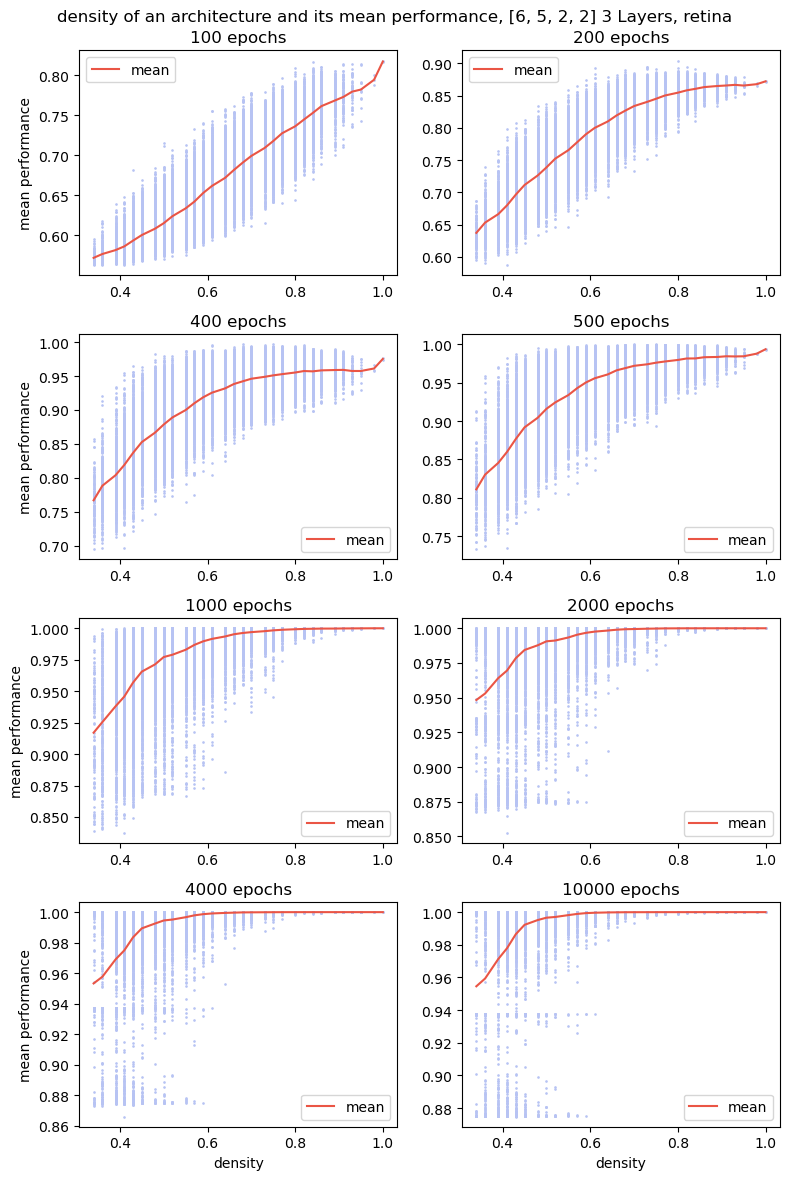

In [5]:
x_metric_name, y_metric_name = ('density', 'mean_performance')
plot_two_metrics_with_mean_multi_ep(
    x_metric_name=x_metric_name,
    y_metric_name=y_metric_name,
    all_result_df=all_first_analsis,
    epochs=epochs,
    task=task,
    time_str=time_str,
    plot_path=plot_path,
    name_addition=f'_multi_archs',
    title_addition=f'{num_layers} Layers, ',
    mark_size=0.8,
    color_ind=1,
    dims=dims,
)

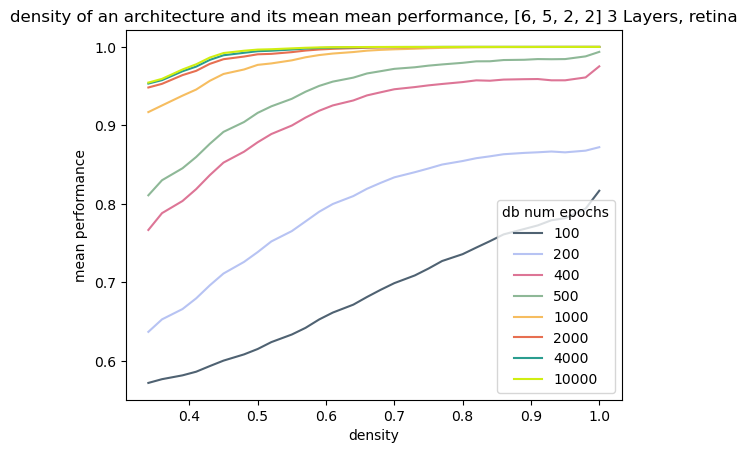

In [6]:
plot_two_metrics_by_ephoc(
    x_metric_name=x_metric_name,
    y_metric_name=y_metric_name,
    all_result_df=all_first_analsis,
    epochs=epochs,
    task=task,
    time_str=time_str,
    plot_path=plot_path,
    title_addition=f'{num_layers} Layers, ',
    dims=dims,
)

In [3]:
ann_reg_res_folder = f"/Volumes/noamaz/modularity/retina/retina_{num_layers}_layers_{dim1}_{dim2}/teach_archs_regression_results"
epochs = []
all_ann_reg_res = []
for file_name in sorted(os.listdir(ann_reg_res_folder)):
    if '.csv' not in file_name:
        continue
    ep = int(file_name.split('_')[-2])
    epochs.append(ep)
    ann_reg_res = pd.read_csv(f"{ann_reg_res_folder}/{file_name}")
    all_ann_reg_res.append(ann_reg_res)

In [5]:
all_ann_reg_res = [x for _, x in sorted(zip(epochs, all_ann_reg_res))]
epochs = sorted(epochs)

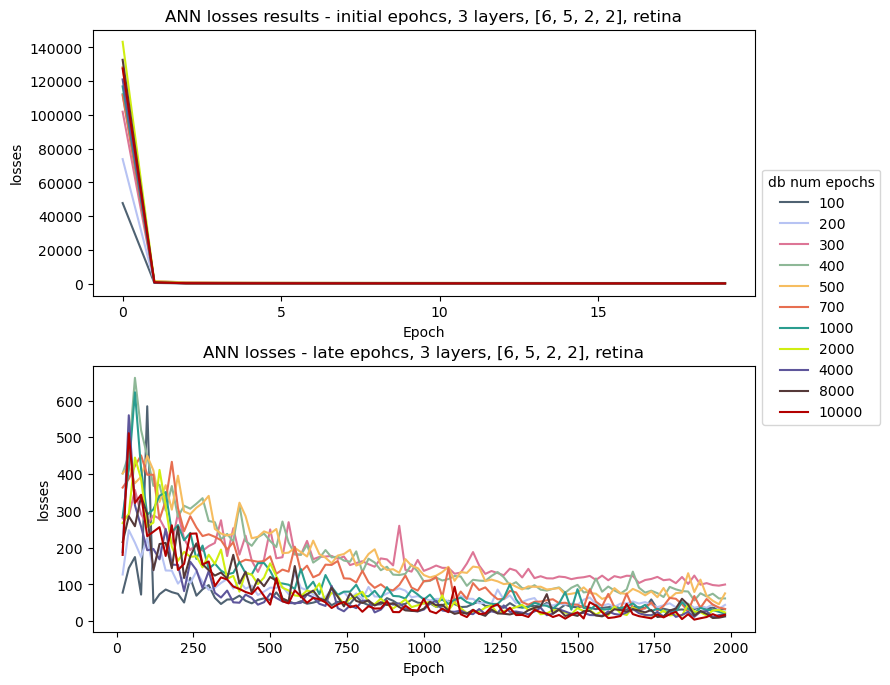

In [21]:

plot_two_ann_metrics_begining_end(
    x_metric_name='Epoch',
    y_metric_name='losses',
    all_result_list=all_ann_reg_res,
    epochs=epochs,
    dims=dims,
    time_str=time_str,
    task=task,
    plot_path=plot_path,
    title_addition=f'{num_layers} layers',
    time_split_ind=20,
    jump=20,
)

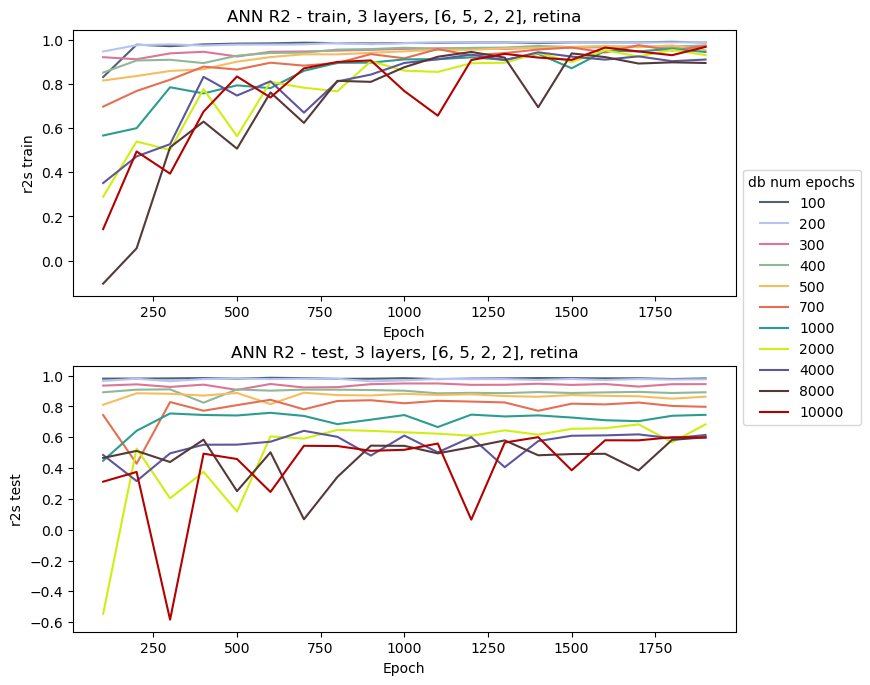

In [22]:
plot_two_ann_metrics_train_test(
    x_metric_name='Epoch',
    y_metric_name='r2s',
    all_result_list=all_ann_reg_res,
    epochs=epochs,
    dims=dims,
    time_str=time_str,
    task=task,
    plot_path=plot_path,
    title_addition=f'{num_layers} layers',
    start_ind=100,
    jump=100,
)

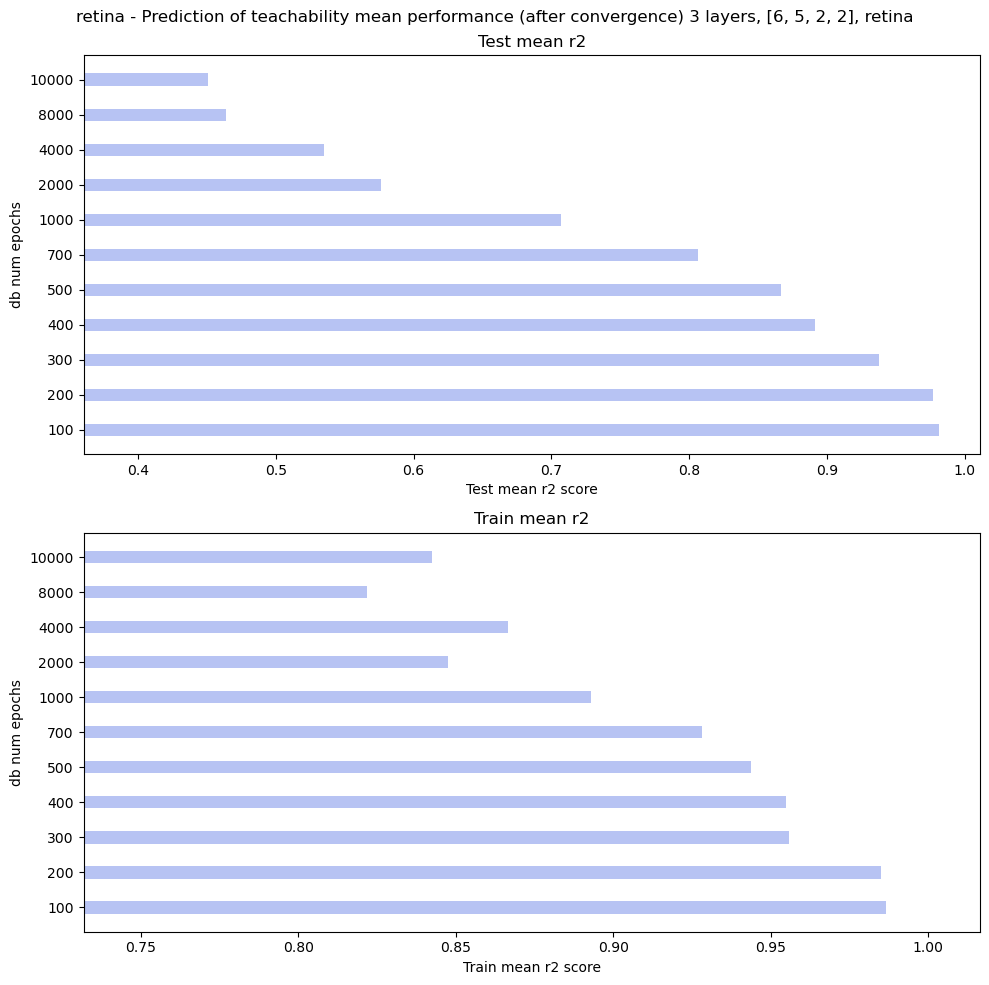

In [6]:
plot_mean_r2_bars(
        metric_name= 'r2s',
        all_result_list=all_ann_reg_res,
    epochs=epochs,
    dims=dims,
    time_str=time_str,
    task=task,
    plot_path=plot_path,
    title_addition=f'{num_layers} layers, ',
start_ind = 300,
)
